# Regressão Linear em Python usando o conjunto de dados California Housing
A regressão linear é uma técnica estatística usada para modelar a relação entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou preditoras). O objetivo é encontrar a equação de uma linha reta que melhor se ajusta aos dados, minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos pela linha. Vamos utilizar o conjunto de dados do "California Housing" para criar um modelo de Regressão Linear que prevê o preço de uma casa com base em suas características.


**Referências:**

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.

Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to Linear Regression Analysis. John Wiley & Sons.

**Etapa 1:** Importando bibliotecas necessárias
Vamos começar importando as bibliotecas necessárias para trabalhar com o conjunto de dados e criar nosso modelo de Regressão Linear.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Etapa 2:** Carregando e explorando o conjunto de dados
Agora, vamos carregar o conjunto de dados do California Housing e explorá-lo para entender melhor suas características.

In [2]:
# Carregando o conjunto de dados California Housing
data = fetch_california_housing()

# Criando um DataFrame com os dados
df = pd.DataFrame(data.data, columns=data.feature_names)

# Adicionando a coluna de preços ao DataFrame
df['PRICE'] = data.target

# Visualizando as primeiras linhas do DataFrame
print(df.head())

# Verificando informações sobre o conjunto de dados
print(df.info())

# Descrição estatística do conjunto de dados
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

**Etapa 3:** Preparando os dados para treinamento do modelo
Vamos separar as variáveis independentes (X) das variáveis dependentes (y) e dividir o conjunto de dados em treinamento e teste.

In [3]:
# Separando variáveis independentes (X) e variável dependente (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Dividindo o conjunto de dados em treinamento e teste (70% para treinamento e 30% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Etapa 4:** Criando e treinando o modelo de Regressão Linear
Agora é hora de criar o modelo de Regressão Linear e treiná-lo com os dados de treinamento

In [4]:
# Criando o objeto do modelo de Regressão Linear
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)


LinearRegression()

**Etapa 5:** Avaliando o modelo
Vamos avaliar o desempenho do modelo usando métricas como o erro médio quadrático (Mean Squared Error - MSE) e o coeficiente de determinação (R²).

In [5]:
# Fazendo previsões com o modelo usando os dados de teste
y_pred = model.predict(X_test)

# Calculando o MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculando o R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 0.5305677824766758
R² Score: 0.595770232606166


**Etapa 6:** Visualizando os resultados
Vamos criar alguns gráficos para visualizar os resultados do modelo.

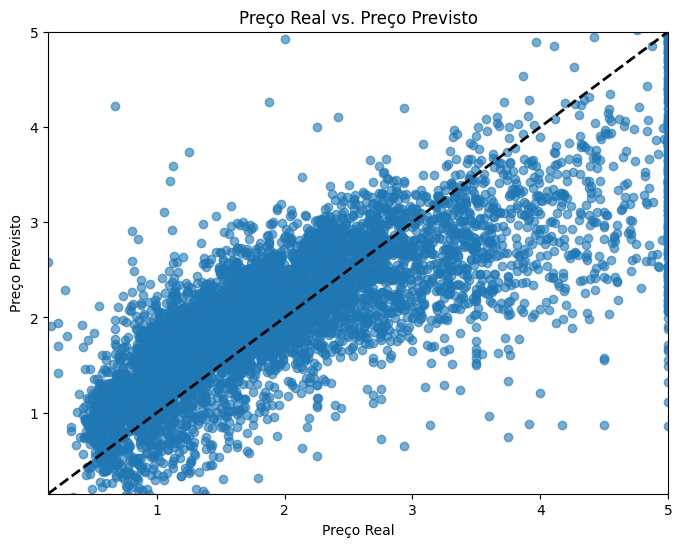

In [6]:
# Gráfico de dispersão dos preços reais em relação aos preços previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Linha de tendência
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Preço Real vs. Preço Previsto')
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))
plt.show()


## Regressão Logística
A Regressão Logística é um tipo de algoritmo de aprendizado de máquina utilizado para realizar tarefas de classificação binária, ou seja, quando queremos prever a pertinência de uma observação em uma das duas classes possíveis. Apesar de ter "regressão" em seu nome, a Regressão Logística é usada para problemas de classificação e não de regressão.

A ideia principal por trás da Regressão Logística é estimar a probabilidade de uma observação pertencer a uma classe específica. Ela é especialmente útil quando trabalhamos com problemas em que a variável de saída (rótulo) é categórica e assume apenas dois valores, como "sim/não", "verdadeiro/falso", "1/0", "positivo/negativo", entre outros.

O algoritmo da Regressão Logística utiliza uma função logística (também conhecida como função sigmoide) para mapear a saída para o intervalo entre 0 e 1. A função sigmoide é definida como:

***sigmoid(z) = 1 / (1 + exp(-z))***

onde "z" é a soma ponderada das variáveis independentes (preditoras) multiplicadas pelos seus respectivos coeficientes.

Durante o treinamento, o algoritmo ajusta os coeficientes de forma que a função logística se aproxime dos rótulos reais dos dados de treinamento. O objetivo é maximizar a probabilidade de o modelo atribuir uma probabilidade alta para as observações pertencentes à classe correta e uma probabilidade baixa para as observações pertencentes à outra classe.

Após o treinamento, podemos usar o modelo para fazer previsões de classificação para novos dados, atribuindo uma probabilidade de pertencer a uma classe ou outra.

## Exemplo de Regressão Logística
Passo 1: Importando as bibliotecas necessárias
Começamos importando as bibliotecas necessárias para trabalhar com a Regressão Logística.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**pandas** é uma biblioteca popular para manipulação e análise de dados

**train_test_split** é uma função do Scikit-learn que nos permite dividir nosso conjunto de dados em subconjuntos de treinamento e teste.

**LogisticRegression** é a classe que implementa o modelo de Regressão Logística no Scikit-learn.

**accuracy_score** é uma função que calcula a acurácia do modelo.

Passo 2: Carregando o conjunto de dados
Vamos carregar um conjunto de dados da internet usando a biblioteca Pandas. Neste exemplo, utilizaremos o conjunto de dados "Pima Indian Diabetes" disponível no repositório Kaggle.

In [8]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data = pd.read_csv(url, header=None)

url é a URL do arquivo CSV contendo o conjunto de dados.

pd.read_csv(url, header=None)  carrega o conjunto de dados a partir da URL e o armazena em um DataFrame do Pandas chamado data.

Definimos header=None para indicar que o arquivo não possui uma linha de cabeçalho.

Passo 3: Separando os dados em atributos de entrada e rótulos de saída
Vamos separar os dados em atributos de entrada (X) e rótulos de saída (y).

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data.iloc[:, :-1] retorna um DataFrame contendo apenas os atributos de entrada, excluindo a última coluna.

data.iloc[:, -1] retorna uma Series contendo os rótulos de saída, correspondentes à última coluna.

Passo 4: Dividindo os dados em conjuntos de treinamento e teste
Vamos dividir os dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_split(X, y, test_size=0.2, random_state=42) divide os dados de entrada (X) e rótulos de saída (y) em conjuntos de treinamento e teste. Neste exemplo, usamos 20% dos dados para teste.

Passo 5: Criando e treinando o modelo de Regressão Logística
Agora, vamos criar uma instância do modelo de Regressão Logística e treiná-lo usando os dados de treinamento.

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

LogisticRegression() cria uma instância do modelo de Regressão Logística.

logreg.fit(X_train, y_train) treina o modelo usando os dados de treinamento.

Passo 6: Fazendo previsõesApós treinar o modelo de Regressão Logística, podemos fazer previsões usando os dados de teste. Aqui está o código correspondente:



In [12]:
y_pred = logreg.predict(X_test)

logreg.predict(X_test) faz previsões usando o modelo treinado com os dados de teste, retornando as classes previstas para os exemplos de teste. As previsões são armazenadas na variável y_pred.

Passo 7: Avaliando o desempenho do modelo
Finalmente, vamos avaliar o desempenho do modelo de Regressão Logística usando uma métrica de avaliação, como a acurácia.

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia: {:.2f}%'.format(accuracy * 100))

Acurácia: 74.68%


accuracy_score(y_test, y_pred) calcula a acurácia comparando os rótulos reais (y_test) com as previsões feitas pelo modelo (y_pred).

print('Acurácia: {:.2f}%'.format(accuracy * 100)) imprime a acurácia do modelo em formato percentual.

Isso conclui o exemplo de uso do modelo de Regressão Logística em Python.

## Exemplo com gráfico

Neste exemplo, vamos gerar um conjunto de dados sintético para fins de demonstração e usar a Regressão Logística para classificar os pontos em duas classes.



Acurácia do modelo: 0.9666666666666667


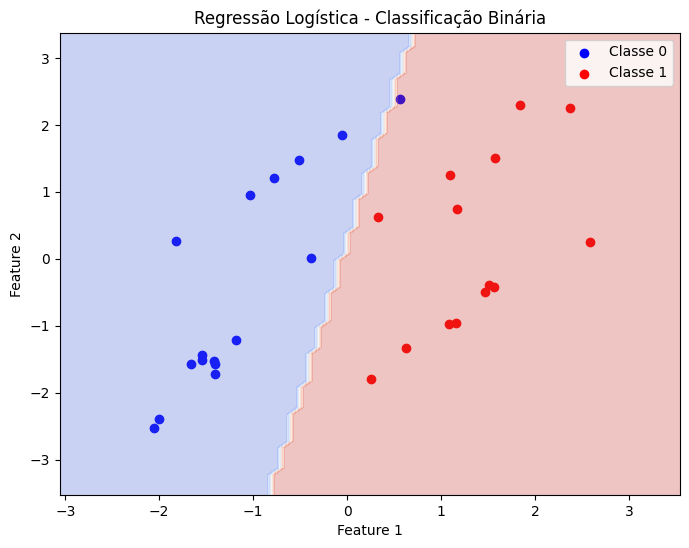

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Gerando um conjunto de dados sintético para classificação binária
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o objeto do modelo de Regressão Logística
model = LogisticRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões com o modelo usando os dados de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

# Plotando o gráfico com as duas classes e a fronteira de decisão
plt.figure(figsize=(8, 6))

# Plotando os pontos da classe 0 em azul
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label='Classe 0')

# Plotando os pontos da classe 1 em vermelho
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label='Classe 1')

# Plotando a fronteira de decisão
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Regressão Logística - Classificação Binária')
plt.legend()
plt.show()


Neste código, geramos um conjunto de dados sintético usando a função make_classification do scikit-learn, que nos permite criar dados de classificação binária com características facilmente separáveis. Em seguida, dividimos o conjunto de dados em dados de treinamento e teste. Utilizamos a classe LogisticRegression para criar o modelo de Regressão Logística, que é treinado com os dados de treinamento.

Por fim, plotamos os pontos das duas classes e a fronteira de decisão aprendida pelo modelo. A fronteira de decisão é a linha que separa as duas classes, e a Regressão Logística tenta encontrar a melhor linha para classificar os pontos corretamente.

Note que, dependendo do conjunto de dados gerado, a fronteira de decisão pode não ser uma linha reta, mas uma curva ou uma superfície, dependendo do número de características (features) usadas no modelo.

## Qual a diferença entre Regressão linear e Regressão Logística?

A principal diferença entre a Regressão Linear e a Regressão Logística está na natureza dos problemas que elas abordam e nos tipos de variáveis de saída que preveem.

A Regressão Linear é usada para prever uma variável de saída contínua com base em uma ou mais variáveis de entrada contínuas. Ela estabelece uma relação linear entre as variáveis de entrada e a variável de saída, ajustando uma linha ou um plano aos dados para fazer previsões. A Regressão Linear é amplamente utilizada para problemas de previsão numérica, como prever o preço de uma casa com base em suas características (área, número de quartos, etc.).

Por outro lado, a Regressão Logística é usada para prever a probabilidade de ocorrência de um evento binário (0 ou 1) com base em variáveis de entrada. Ela é adequada para problemas de classificação binária, onde queremos atribuir uma observação a uma das duas classes possíveis. A Regressão Logística não assume uma relação linear entre as variáveis de entrada e a probabilidade de ocorrência do evento. Em vez disso, ela aplica uma função logística (também conhecida como sigmoid) à combinação linear das variáveis de entrada para estimar a probabilidade. Essa probabilidade é então mapeada para uma classe específica usando um limite (por exemplo, 0,5). A Regressão Logística é amplamente usada em áreas como medicina, ciências sociais e aprendizado de máquina.

Em resumo, a Regressão Linear é usada para prever uma variável contínua, enquanto a Regressão Logística é usada para prever a probabilidade de ocorrência de um evento binário.

### Métricas

Métricas de análise de desempenho
O Erro Quadrático Médio (MSE) e o Coeficiente de Determinação (R-squared) são métricas comuns usadas para avaliar o desempenho de modelos de regressão. Eles fornecem informações sobre a qualidade do ajuste do modelo aos dados. Vou explicar como cada uma dessas métricas funciona:

1. Erro Quadrático Médio (MSE):

O MSE é uma medida que quantifica a média dos quadrados dos erros entre as previsões do modelo e os valores reais. Em outras palavras, o MSE calcula a média dos quadrados das diferenças entre os valores reais e os valores previstos pelo modelo de regressão. Quanto menor o valor do MSE, melhor o modelo se ajusta aos dados. O MSE é calculado da seguinte forma:

MSE = (1 / n) * Σ(yi - ŷi)²

Onde:
- MSE é o Erro Quadrático Médio.
- n é o número de observações no conjunto de dados.
- yi é o valor real.
- ŷi é o valor previsto pelo modelo.

2. Coeficiente de Determinação (R-squared):

O R-squared, também conhecido como coeficiente de determinação, mede a proporção da variabilidade na variável dependente (valor alvo) que é explicada pelo modelo de regressão. Em outras palavras, ele indica quanta variação na variável dependente pode ser atribuída às variáveis independentes no modelo. O R-squared varia de 0 a 1, onde 0 significa que o modelo não explica nenhuma variação e 1 significa que o modelo explica toda a variação.

O R-squared é calculado da seguinte forma:

R-squared = 1 - (SSE / SST)

Onde:
- SSE (Soma dos Quadrados dos Erros) é a soma dos quadrados das diferenças entre os valores reais e os valores previstos.
- SST (Soma Total dos Quadrados) é a soma dos quadrados das diferenças entre os valores reais e a média dos valores reais.

Um R-squared de 1 indica um modelo perfeito em que todas as variações são explicadas pelas variáveis independentes. No entanto, um R-squared baixo indica que o modelo não é eficaz em explicar a variação.

Em resumo, o MSE mede o erro médio entre as previsões do modelo e os valores reais, enquanto o R-squared mede a qualidade geral do ajuste do modelo e sua capacidade de explicar a variação nos dados. Ambas as métricas são úteis para avaliar o desempenho de modelos de regressão, mas devem ser usadas em conjunto para obter uma compreensão completa do ajuste do modelo.

Mean Squared Error (MSE): 0.13
R-squared (R2): 0.81


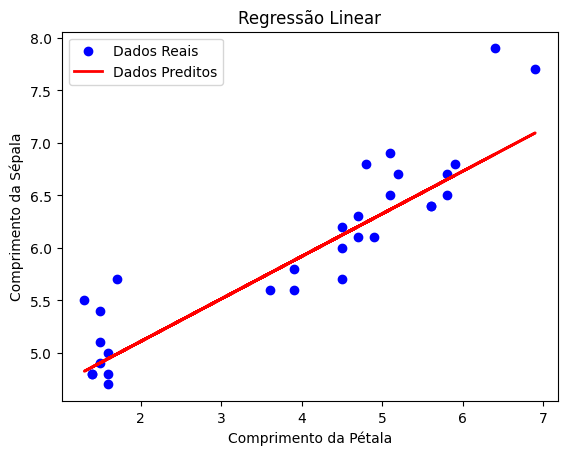

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o conjunto de dados "Iris"
iris = datasets.load_iris()
X = iris.data[:, 2:3]  # Use apenas a terceira característica (comprimento da pétala)
y = iris.data[:, 0]   # Use a primeira característica (comprimento da sépala) como valor alvo

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir a acurácia do modelo
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualizar o ajuste do modelo
plt.scatter(X_test, y_test, color='b', label='Dados Reais')
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Dados Preditos')
plt.xlabel("Comprimento da Pétala")
plt.ylabel("Comprimento da Sépala")
plt.title("Regressão Linear")
plt.legend()
plt.show()


Mean Squared Error (MSE): 3884.94
R-squared (R2): 0.28


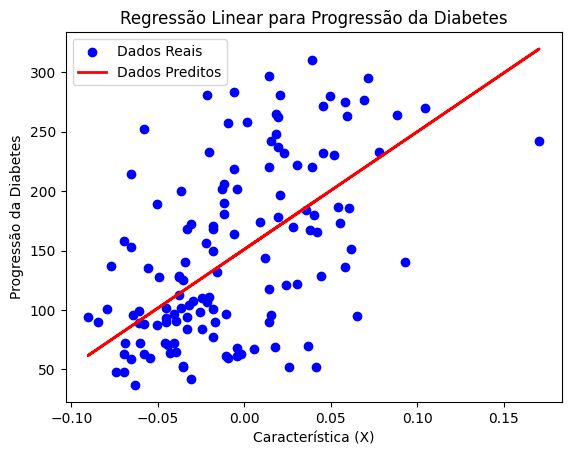

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o conjunto de dados "Diabetes"
diabetes = datasets.load_diabetes()
X = diabetes.data[:, 2:3]  # Use uma característica (índice 2) como entrada
y = diabetes.target  # Use a medida de progressão da doença como valor alvo

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir a acurácia do modelo
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualizar o ajuste do modelo
plt.scatter(X_test, y_test, color='b', label='Dados Reais')
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Dados Preditos')
plt.xlabel("Característica (X)")
plt.ylabel("Progressão da Diabetes")
plt.title("Regressão Linear para Progressão da Diabetes")
plt.legend()
plt.show()


Mean Squared Error (MSE): 0.71
R-squared (R2): 0.46


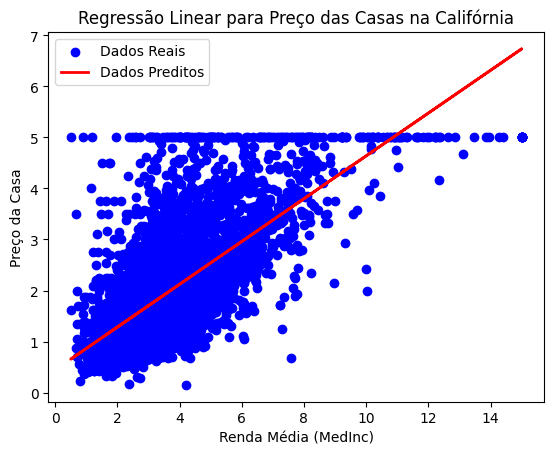

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o conjunto de dados "California Housing Prices"
data = fetch_california_housing()

# Converter os dados em um DataFrame (opcional, mas pode ser útil)
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Selecionar a característica "MedInc" (renda média) como entrada (X)
# e o preço da casa como valor alvo (y)
X = df[['MedInc']]
y = df['target']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir a acurácia do modelo
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualizar o ajuste do modelo
plt.scatter(X_test, y_test, color='b', label='Dados Reais')
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Dados Preditos')
plt.xlabel("Renda Média (MedInc)")
plt.ylabel("Preço da Casa")
plt.title("Regressão Linear para Preço das Casas na Califórnia")
plt.legend()
plt.show()


Exemplos de Regressão Logísticas

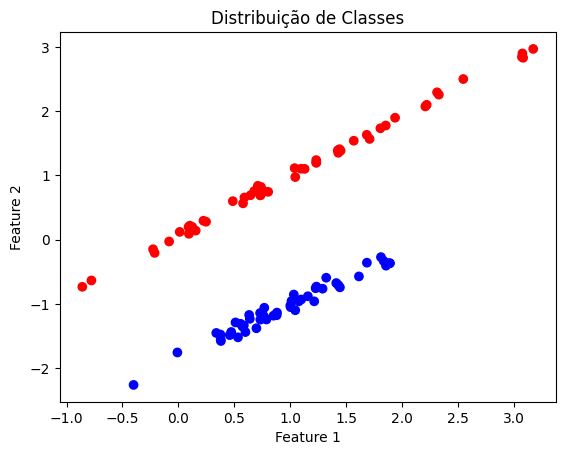

Acurácia: 1.00


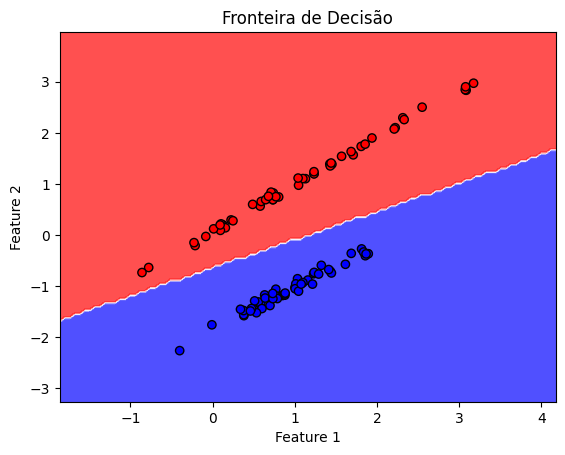

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Gerando dados
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Visualizando os dados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribuição de Classes')
plt.show()

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predizendo os resultados no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia:.2f}')

# Visualizando a fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fronteira de Decisão')
plt.show()


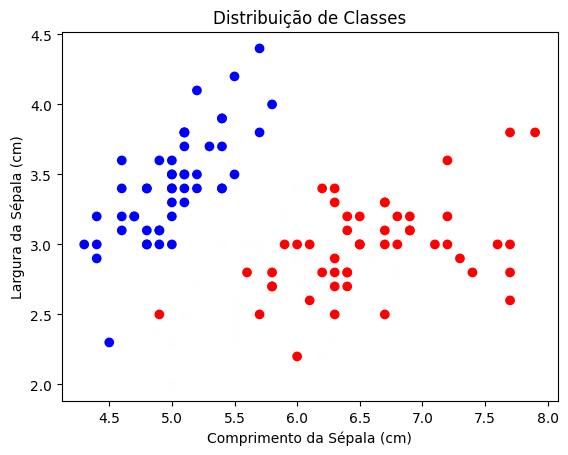

Acurácia: 0.90


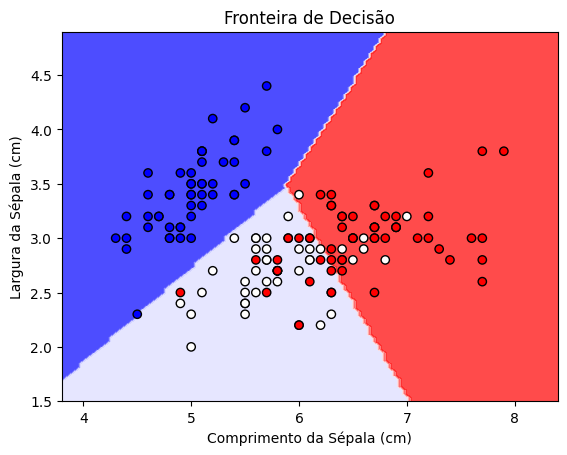

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data[:, :2]  # Pegando apenas as duas primeiras características para facilitar a visualização
y = iris.target

# Visualizando os dados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('Distribuição de Classes')
plt.show()

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predizendo os resultados no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia:.2f}')

# Visualizando a fronteira de decisão
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('Fronteira de Decisão')
plt.show()
